# Red Wine Quality Analysis

In [37]:
library(rethinking)
library(plyr)
library(RColorBrewer)

## Data Exploration

In [3]:
d <- read.csv('./winequality-red.csv')

In [9]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
fixed.acidity,8.31963727,1.741096318,6.20000,11.60000,▁▁▃▇▅▂▂▁▁▁▁▁
volatile.acidity,0.52782051,0.179059704,0.28000,0.83055,▁▅▇▅▁▁▁▁
citric.acid,0.27097561,0.194801137,0.00000,0.59000,▇▃▅▃▃▂▁▁▁▁
residual.sugar,2.53880550,1.409928060,1.60000,4.71100,▅▇▁▁▁▁▁▁
chlorides,0.08746654,0.047065302,0.05400,0.12300,▁▇▁▁▁▁▁▁▁▁▁▁▁
free.sulfur.dioxide,15.87492183,10.460156970,4.00000,35.00000,▇▇▃▂▁▁▁▁
total.sulfur.dioxide,46.46779237,32.895324478,11.89000,110.00000,▇▂▁▁▁▁
density,0.99674668,0.001887334,0.99371,0.99980,▁▁▁▁▂▅▇▇▃▂▁▁▁▁
pH,3.31111320,0.154386465,3.07000,3.56000,▁▁▁▂▃▇▇▃▂▁▁▁▁▁


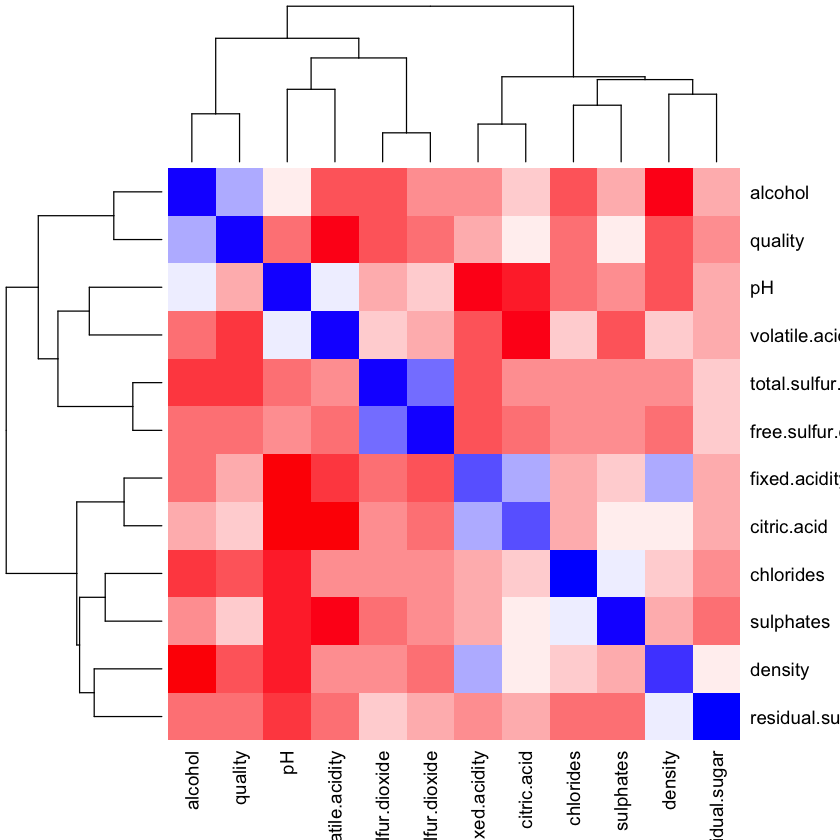

In [46]:
palette = colorRampPalette(c("red", "white", "blue")) (20)
d.cor <- cor(d)
heatmap(round(d.cor, 2), revC=T, col=palette)

In [28]:
round(d.cor, 2)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
fixed.acidity,1.00,-0.26,0.67,0.11,0.09,-0.15,-0.11,0.67,-0.68,0.18,-0.06,0.12
volatile.acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.23,-0.26,-0.20,-0.39
citric.acid,0.67,-0.55,1.00,0.14,0.20,-0.06,0.04,0.36,-0.54,0.31,0.11,0.23
residual.sugar,0.11,0.00,0.14,1.00,0.06,0.19,0.20,0.36,-0.09,0.01,0.04,0.01
chlorides,0.09,0.06,0.20,0.06,1.00,0.01,0.05,0.20,-0.27,0.37,-0.22,-0.13
free.sulfur.dioxide,-0.15,-0.01,-0.06,0.19,0.01,1.00,0.67,-0.02,0.07,0.05,-0.07,-0.05
total.sulfur.dioxide,-0.11,0.08,0.04,0.20,0.05,0.67,1.00,0.07,-0.07,0.04,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.68,0.23,-0.54,-0.09,-0.27,0.07,-0.07,-0.34,1.00,-0.20,0.21,-0.06
sulphates,0.18,-0.26,0.31,0.01,0.37,0.05,0.04,0.15,-0.20,1.00,0.09,0.25


In [44]:
counts = count(d$quality)
barplot(counts$freq, names.arg=counts$x)

### Observations
* The data set consists of numerical input variables and an ordinal outcome variable.
* Some of the variables are highly correlated

## Questions to Ask

Before starting any kind of analysis, let's think about which questions we can ask towards this dataset.  
   
**Prediction:**
* Given a new wine that has a known chemical composition, what is the chance of it being a great wine?
* Given a new wine that has a known chemical composition, what is its posterior distribution of quality scores?
* Given a new wine that has a known chemical composition, what is its risk of being a poor wine?


**Inference:**
* Which chemical composition makes a good wine?
* Which chemical composition makes a poor wine?
* What is the relationship between wine quality and alcohol concentration? Is there a mediating influence of other chemicals on the relationship between wine quality and alcohol?

## Model choice

As the outcome variable `quality` is an ordinal variable, we need to model it using an **ordered categorical model**. 